In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random ,os
import time,pickle
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [41]:
model_cpt_sup = 'restaurant_1641178246_cvt_epoch5_acc_75.59_f1_60.04.pkl'
model_cpt_cvt = 'restaurant_1641178027_cvt_epoch19_acc_77.62_f1_67.03.pkl'
opt = DEFAULT_OPTION.set({'dataset': 'restaurant'})  # select dataset

NameError: name 'DEFAULT_OPTION' is not defined

In [36]:
# 读取测试结果 
saved_dir = 'state/predict/'

predict_sup =   # fname.pkl
predict_cvt = instructor.predict(name=model_cpt_cvt)

# load predict results
sup = pickle.load(open(predict_sup, 'rb'))
cvt = pickle.load(open(predict_cvt, 'rb'))
print('sup [true]:{} [false]:{} [acc]:{}'.format(len(sup['true']), len(sup['false']),
                                                 len(sup['true']) / (len(sup['true']) + len(sup['false']))))
print('cvt [true]:{} [false]:{} [acc]:{}'.format(len(cvt['true']), len(cvt['false']),
                                                 len(cvt['true']) / (len(cvt['true']) + len(cvt['false']))))

# intersection sentences ,failed in the SUP but success in  CVT
sentence_sup = dict()
sentence_cvt = dict()

for x in sup['false']:
    c, a, t, o = x
    sentence_sup[(c, a)] = (t, o)
for x in cvt['true']:
    c, a, t, o = x
    sentence_cvt[(c, a)] = (t, o)

f_inter_sentence = saved_dir + 'inter_sentences.pkl'
if os.path.exists(f_inter_sentence):
    print('loading inter sentences……')
    sentences = pickle.loads(open(f_inter_sentence, 'rb'))
else:
    sup_keys = set(list(sentence_sup.keys()))
    cvt_keys = set(sentence_cvt.keys())
    sentences = sup_keys.intersection(cvt_keys)  # inter

print('inter sentences', len(sentences))
print('=' * 30)
print('【neg】:%s 【neutral】:%s 【positive】:%s' % (0, 1, 2))
labels = {0: 'negative', 1: 'neutral', 2: 'positive'}
print('\n' * 2)
sentences = sorted(sentences, key=lambda x: sentence_cvt[x][0])  # sorted by target label
for x in sentences:
    t_label = labels[sentence_sup[x][0]]
    p_label_sup = labels[sentence_sup[x][1]]
    p_label_cvt = labels[sentence_cvt[x][1]]
    print('[context]:{}\n[aspect]:{}'.format(x[0], x[1]))
    print('[target]:{} [p_cvt]:{} [p_sup]:{} '.format(sentence_sup[x][0], sentence_cvt[x][1], sentence_sup[x][1]))
    print('[target]:{} [p_cvt]:{} [p_sup]:{} '.format(t_label, p_label_cvt, p_label_sup, ))
    print('=' * 30)

sup: true:482 false:156
cvt: true:487 false:151


In [39]:
sentence_sup=dict()
sentence_cvt=dict()

for x in sup['false']:
    c,a,t,o = x
    sentence_sup[(c,a)]=(t,o)
for x in semit['true']:
    c,a,t,o = x
    sentence_cvt[(c,a)]=(t,o)

# sorted by target label
    
sup_keys = set(list(sentence_sup.keys()))
cvt_keys= set(sentence_cvt.keys())
sentences = sup_keys.intersection(cvt_keys)  # inter
print('inter sentences',len(sentences))
print('='*30)
print('【neg】:%s 【neutral】:%s 【positive】:%s' % (0,1,2))
labels={0:'negative',1:'neutral',2:'positive'}
print('\n'*2)
sentences= sorted(sentences,key=lambda x:sentence_cvt[x][0])  # sorted by target label 
for x in sentences:
    t_label = labels[ sentence_sup[x][0]]
    p_label_sup = labels[ sentence_sup[x][1]]
    p_label_cvt = labels[ sentence_cvt[x][1]]
    print('[context]:{}\n[aspect]:{}'.format(x[0],x[1]))
    print('[target]:{} [p_cvt]:{} [p_sup]:{} '.format(t_label,p_label_cvt,p_label_sup,))
    print('='*30)

inter sentences 33
【neg】:0 【neutral】:1 【positive】:2



[context]:i just bought the new macbook pro , the 13 '' model , and i ca n't believe apple keeps making the same mistake with regard to usb ports .
[aspect]:usb ports
[target]:negative [p_cvt]:negative [p_sup]:neutral 
[context]:also , in using the built-in camera , my voice recording for my vlog sounds like the interplanetary transmissions in the `` star wars '' saga .
[aspect]:voice recording
[target]:negative [p_cvt]:negative [p_sup]:neutral 
[context]:customization on mac is impossible .
[aspect]:customization
[target]:negative [p_cvt]:negative [p_sup]:positive 
[context]:but i do not like win8 .
[aspect]:win8
[target]:negative [p_cvt]:negative [p_sup]:neutral 
[context]:the volume is really low to low for a laptopwas not expectin t volume to be so lowan i hate that about this computer
[aspect]:volume
[target]:negative [p_cvt]:negative [p_sup]:positive 
[context]:i was also informed that the components of the mac book were dirt

In [ ]:
sentence = 'this mac mini does not have a built-in mic , and it would seem that its mac os 10.9 does not handle external microphones properly .'

print('target:{} p_label_sup:{} p_label_cvt:{}'.format())

In [117]:
sentence =['the', 'staff', 'members', 'are', 'extremely', 'friendly', 'and', 'even', 'replaced', 'my', 'drink', 'once', 'when', 'i', 'dropped', 'it', 'outside', '.']
semit_max_indice = pickle.load(open('state/semit_max_indice.pkl','rb')).reshape(1,-1)

semit_score = pickle.load(open('state/semit_score.pkl','rb'))

semif_max_indice = pickle.load(open('state/semif_max_indice.pkl','rb')).reshape(1,-1)

semif_score = pickle.load(open('state/semif_score.pkl','rb'))

print(len(sentence),sentence.index('drink'))

18 10


In [123]:
print(semit_score.flatten())
print(semif_score.flatten())

[0.05555885 0.05555673 0.05555829 0.05555732 0.05555276 0.05554964
 0.05555715 0.0555553  0.05555272 0.05555291 0.05555218 0.05555345
 0.05555403 0.05555663 0.05555771 0.05555782 0.05555817 0.05555826]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]


In [82]:
# semif 
def count_max(max_indice):
    max_counts = []
    for i in range(len(sentence)):
        count = (max_indice==i).sum()
        max_counts.append((i,sentence[i],count))
    return max_counts 

In [99]:
semif_max=count_max(semif_max_indice)  # semif 
print(semif_max)
semif_max = np.array([x[2] for x in semif_max])
semif_max

[(0, 'the', 5), (1, 'staff', 16), (2, 'members', 13), (3, 'are', 10), (4, 'extremely', 27), (5, 'friendly', 56), (6, 'and', 11), (7, 'even', 4), (8, 'replaced', 29), (9, 'my', 12), (10, 'drink', 39), (11, 'once', 8), (12, 'when', 7), (13, 'i', 6), (14, 'dropped', 37), (15, 'it', 4), (16, 'outside', 7), (17, '.', 9)]


array([ 5, 16, 13, 10, 27, 56, 11,  4, 29, 12, 39,  8,  7,  6, 37,  4,  7,
        9])

In [98]:
semit_max=count_max(semit_max_indice)  # semif 
print(semit_max)
semit_max = np.array([x[2] for x in semit_max])
semit_max

[(0, 'the', 29), (1, 'staff', 15), (2, 'members', 2), (3, 'are', 13), (4, 'extremely', 14), (5, 'friendly', 43), (6, 'and', 19), (7, 'even', 3), (8, 'replaced', 14), (9, 'my', 11), (10, 'drink', 39), (11, 'once', 1), (12, 'when', 3), (13, 'i', 28), (14, 'dropped', 16), (15, 'it', 10), (16, 'outside', 8), (17, '.', 32)]


array([29, 15,  2, 13, 14, 43, 19,  3, 14, 11, 39,  1,  3, 28, 16, 10,  8,
       32])

Text(0.5, 105.12, 'sentence')

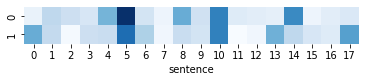

In [112]:
stack =  np.stack([semif_max,semit_max])
ax=sns.heatmap(stack,cmap='Blues',cbar=False,square=True)
plt.xlabel('sentence')
# ax.set_xticks(range(18,36))  # x轴刻度

C:\Users\hollis\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\hollis\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


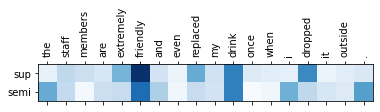

In [116]:
# 画图 
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1*1 获取第1幅图片
# matshow 返回对象  AxesImage
cax=ax.matshow(stack,cmap='Blues')  


# 如果不添加刻度的话 就会默认显示012 这样的数字索引 
# ticklabels 用于显示文字 添加一开始的空字符串 
# ''空字符 会在原点显示 其余字符会在每个矩阵的中间位置显示 
# 也就是说 如果矩阵有n列 除了n个 文字刻度 显示之外 还要在它的头前面加一个 '' 总计n+1 
# y轴同理 
xticklabels=['']+sentence
yticklabels=['']+['sup','semi']

ax.set_xticklabels(xticklabels,rotation=90)  # 设置x轴刻度标签
ax.set_yticklabels(yticklabels)

# majorlocator 是用于调整刻度间距的 
# MultipleLocator 表示固定间隔1
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

C:\Users\hollis\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\hollis\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


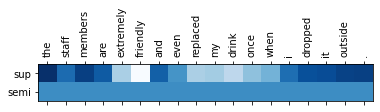

In [120]:
# 画图 
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # 1*1 获取第1幅图片
# matshow 返回对象  AxesImage
score_stack = np.stack([semit_score,semif_score]).reshape(2,-1)
cax=ax.matshow(score_stack,cmap='Blues')  


# 如果不添加刻度的话 就会默认显示012 这样的数字索引 
# ticklabels 用于显示文字 添加一开始的空字符串 
# ''空字符 会在原点显示 其余字符会在每个矩阵的中间位置显示 
# 也就是说 如果矩阵有n列 除了n个 文字刻度 显示之外 还要在它的头前面加一个 '' 总计n+1 
# y轴同理 
xticklabels=['']+sentence
yticklabels=['']+['sup','semi']

ax.set_xticklabels(xticklabels,rotation=90)  # 设置x轴刻度标签
ax.set_yticklabels(yticklabels)

# majorlocator 是用于调整刻度间距的 
# MultipleLocator 表示固定间隔1
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))